# 딥러닝 라이브러리


## Tensorflow (google) - 산업용
- 이미지 관련 라이브러리
- keras를 이용해 코딩이 쉬워짐
- 순차적, 함수적, 클래스 기반 코딩 모두 사용 가능


## Pytorch (meta) - 연구용
- 자연어 관련 라이브러리
- 허깅페이스, 랭체인
- 클래스 기반 코딩 -> 클래스 기반 코딩법이 익숙치 않다면 어려울 수 있음

### 인공신경망(ANN)

- 장점
    - 잡음에 강함 : 실제 데이터의 오류나 노이즈가 있어도 민감하게 반응하지 X
    - 비선형 문제 해결에 유용 : 선형(직선)으로 구분하기 어려운 패턴 학습 가능
    - 패턴 인식/분류/예측에 효과적 : 대량의 입력 데이터를 바탕으로 숨겨진 관계를 찾는데 용이
    - 스스로 가중치 조정(학습) : 입력 신호마다 가중치를 스스로 최적화하며 학습
- 단점
    - 학습에 오랜 시간 소요 : 층(layer)이 많아지고 노드 복잡해질수록 학습(연산) 시간이 급증
    - 지역 최적해 문제 : 초기 가중치 설정에 따라 전역 최적해가 아닌 지역 최적해에 머물러 학습 완료되는 문제
    - 가중치 신뢰도 낮음 : 수백만 개의 가중치 중 의미 있는 값의 가중치를 검증 어려움
    - 결과 해석이 쉽지 않음 : 해당 결과가 어떻게 나왔는지에 대한 설명 어려움
    - 구조(하이퍼파라미터) 결정 난이도 : 은닉층의 개수나 각 층의 노드 수를 정하는 것이 어려움
        - 실험과 튜닝에 시간이 필요
----

### 인공신경망 학습 과정

- 뉴런 : 사람의 뇌 구조 모방한 구조
    - 입력값 : 외부나 이전층으로부터 들어오는 데이터
    - 가중치와 편향 : 각 입력의 중요도 조절 및 결과값의 기준점 설정
    - 활성 함수 : 가중합에 비선형성을 부여 -> 최종 출력 결정
        - 선형적인 패턴만 존재하는 것이 아니기 때문에 데이터 구분에 더욱 용이
        - 시그모이드 함수(출력층 : 이진분류), 소프트맥스 함수(출력층 : 다중 클래스 분류), ReLU 함수(은닉층 : 훈련할 때 사용)


## 데이터 불러오기
- https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

### 전처리 수행

In [36]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv')
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [37]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [39]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [40]:
data['Family'] = data["SibSp"] + data['Parch']

In [41]:
data.isna().sum() / len(data) * 100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Embarked     0.224467
Family       0.000000
dtype: float64

In [42]:
data.loc[:,'Age'] = data['Age'].fillna(data['Age'].mean())
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.000000,1,0,S,1
1,1,1,female,38.000000,1,0,C,1
2,1,3,female,26.000000,0,0,S,0
3,1,1,female,35.000000,1,0,S,1
4,0,3,male,35.000000,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,0
887,1,1,female,19.000000,0,0,S,0
888,0,3,female,29.699118,1,2,S,3
889,1,1,male,26.000000,0,0,C,0


In [43]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [44]:
data = data.drop(['SibSp', 'Parch'], axis=1)

In [45]:
data = pd.get_dummies(data, drop_first=True)

In [46]:
data

,Survived,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


### 홀드아웃 수행

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 딥러닝 시에도 데이터의 스케일을 맞추는 것이 좋음
- StandardScaler, MinMaxScaler를 주로 사용, 이상값이 많을 경우 RobustScaler를 사용
- 이진분류(0,1): MinMaxScaler
- 연속값예측: StandardScaler

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
mms = MinMaxScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)

mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index)

In [52]:
display(mms_X_train)
display(mms_X_test)

,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
748,0.0,0.233476,0.1,1.0,0.0,1.0
45,1.0,0.367921,0.0,1.0,0.0,1.0
28,1.0,0.367921,0.0,0.0,1.0,0.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
403,1.0,0.346569,0.1,1.0,0.0,1.0
...,...,...,...,...,...,...
476,0.5,0.421965,0.1,1.0,0.0,1.0
190,0.5,0.396833,0.0,0.0,0.0,1.0
736,1.0,0.597889,0.4,0.0,0.0,1.0
462,0.0,0.585323,0.0,1.0,0.0,1.0


,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델 생성 및 분석
- Sequential: 인공신경망을 순차적으로 작성할 때 사용
- Dense: 층, 레이어
--- 
1. 신경망 모델 정의
2. 신경망 모델 훈련
3. 훈련된 모델로 테스트
4. 검증

In [53]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

- 입력층은 반드시 독립변수 수를 정확히 지정
- 신경망 모델의 은닉층은 2~3개 정도로 한다
- Dense의 노드 수는 2의 배수로 지정 : 2 4 8 16 256
    - Dense의 노드는 큰 수에서 작은 수로 줄여나간다
- 은닉층의 활성화 함수 : Reru
- 출력층은 이진분류일 경우 : sigmoid, 다중분류일 경우 : softmax
- 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 활성화 함수 없이 노드를 1로 지정

In [54]:
# 신경망 모델 정의 kearas 3.0, tensorflow 2.19 기준

model = Sequential()
model.add(Input(shape=(mms_X_train.shape[1],))) # 입력층
model.add(Dense(64, activation='relu')) # 은닉층
model.add(Dense(32, activation='relu')) # 은닉층
model.add(Dense(16, activation='relu')) # 은닉층
model.add(Dense(1, activation='sigmoid')) # 출력층 : 이진분류(sigmoid)

# model.compile() : 모델 파라미터 세팅
- loss : 오차 계산 지표
    - 이진분류 : binary_crossentropy
    - 다중분류 : categorical_crossentropy
    - 데이터의 0이 많은 희소행렬인 경우 : sparse_categorical_crossentropy
    - 연속형 데이터(회귀분석) : mse
- optimizer : learing_rate
    - adam을 가장 많이 사용
- metrics : 평가지표(Accuracy)

In [55]:
# 모델 파라미터 세팅
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# model.fit(X_train, y_train) : 모델 훈련 
- epochs : 전체 데이터를 한 번 훈련하는 주기
- batch_size : 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절(2의 배수)
    - 32, 64로 쪼개서 넣는 것 추천
- validation_data : 검증 데이터로 모델 검증 실시

In [56]:
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(mms_X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 338ms/step - accuracy: 0.4389 - loss: 0.7388 - val_accuracy: 0.7276 - val_loss: 0.6442
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7314 - loss: 0.6337 - val_accuracy: 0.7463 - val_loss: 0.5937
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.7553 - loss: 0.5777 - val_accuracy: 0.7761 - val_loss: 0.5325
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7776 - loss: 0.5043 - val_accuracy: 0.7873 - val_loss: 0.4962
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.7723 - loss: 0.4974 - val_accuracy: 0.7761 - val_loss: 0.4809
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7978 - loss: 0.4789 - val_accuracy: 0.7910 - val_loss: 0.4702
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7806 - loss: 0.4868 - val_accuracy: 0.7873 - val_loss: 0.4664
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8022 - loss: 0.4697 - val_accuracy

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8108 - loss: 0.4398 - val_accuracy: 0.8097 - val_loss: 0.4264
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8313 - loss: 0.3932 - val_accuracy: 0.8284 - val_loss: 0.4302
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8037 - loss: 0.4406 - val_accuracy: 0.7948 - val_loss: 0.4309
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8191 - loss: 0.4214 - val_accuracy: 0.8209 - val_loss: 0.4258
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8176 - loss: 0.4197 - val_accuracy: 0.8060 - val_loss: 0.4250
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8332 - loss: 0.4064 - val_accuracy: 0.7985 - val_loss: 0.4243
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8351 - loss: 0.4117 - val_accuracy: 0.8284 - val_loss: 0.4232
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8418 - loss: 0.3856 - val_accuracy: 0.8060 

# 딥러닝 모델 성능 평가
- 딥러닝에서 모델의 성능을 평가하는 지표는 loss
    - 실행할 때마다 다른 결과를 나타낼 수 있음 -> 과정은 알 수 없음
- 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않는 경우도 존재
- Accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [57]:
score = model.evaluate(mms_X_test, y_test)
print('test loss', score[0])
print('test accuracy', score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8211 - loss: 0.4263
test loss 0.4270135462284088
test accuracy 0.8134328126907349


In [58]:
# 모델의 결과가 딕셔너리 형태로 저장
for i in history.history:
    print(i)

accuracy
loss
val_accuracy
val_loss


## history.history['loss'], history.history['val_loss'] : 훈련 결과 시각화
- 간격이 넓다는 것은 오버피팅 되었을 확률이 높다
- 간격이 좁은 곳에서 성능이 높다는 것을 알 수 있다

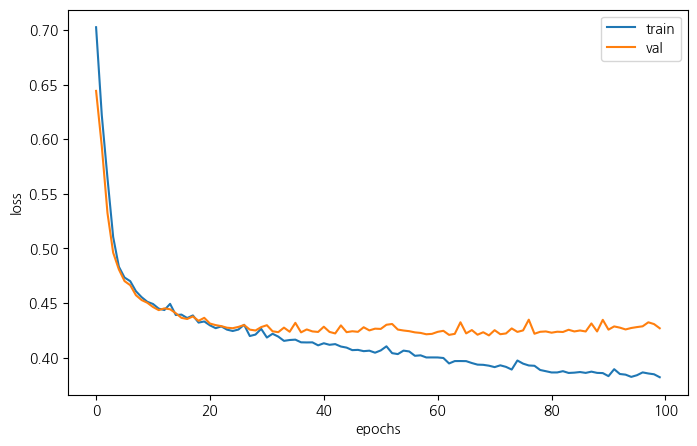

In [59]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델의 예측 값 출력

In [60]:
# 확률로 예측값이 나오게 됨 
pred = model.predict(mms_X_test)
pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step


array([[0.29069835],
       [0.14901227],
       [0.11311875],
       [0.11796529],
       [0.07083869],
       [0.2964161 ],
       [0.10343718],
       [0.7887952 ],
       [0.10815354],
       [0.96321625],
       [0.78836316],
       [0.99156594],
       [0.29589757],
       [0.29037476],
       [0.575117  ],
       [0.8610483 ],
       [0.11311875],
       [0.3912408 ],
       [0.93283486],
       [0.37208095],
       [0.05598351],
       [0.11187293],
       [0.49725226],
       [0.11796529],
       [0.26715025],
       [0.16313729],
       [0.9794503 ],
       [0.23107283],
       [0.2752059 ],
       [0.21858166],
       [0.89228463],
       [0.96610117],
       [0.11311875],
       [0.8517242 ],
       [0.98396116],
       [0.4847906 ],
       [0.11311875],
       [0.05894814],
       [0.11311875],
       [0.33799565],
       [0.10343718],
       [0.9374025 ],
       [0.31691214],
       [0.9773237 ],
       [0.9803468 ],
       [0.1609965 ],
       [0.45999122],
       [0.267

In [62]:
result = pd.DataFrame(dict(y_test=y_test, pred=pred[:,0]))
result

,y_test,pred
625,0,0.290698
566,0,0.149012
459,0,0.113119
804,1,0.117965
338,1,0.070839
...,...,...
184,1,0.734247
607,1,0.377517
624,0,0.139900
103,0,0.099048


In [66]:
result['pred'] = result['pred'].apply(lambda x:1 if x >= 0.5 else 0)

In [71]:
result

,y_test,pred
625,0,0
566,0,0
459,0,0
804,1,0
338,1,0
...,...,...
184,1,1
607,1,0
624,0,0
103,0,0


##  모델 결과 확인

In [74]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(result['y_test'], result['pred']))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       165
           1       0.84      0.64      0.73       103

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.82      0.81      0.81       268



## DecisionTreeClassifier 모델 적용
- 딥러닝 모델보다 속도도 빠르고 성능 차이도 나지 않음
- 데이터셋의 종류와 갯수에 따라 머신러닝을 선정하는 것이 좋을 수 있음

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
# 최적의 성능을 내는 max_depth 확인
# for i in range(1,11):
#     print('='*30, f"max_depth = {i}", '='*30)
#     dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
#     dtc.fit(mms_X_train, y_train)
#     pred2 = dtc.predict(mms_X_test)

#     print(classification_report(y_test, pred2))

In [87]:
# 최적의 성능을 내는 max_depth 3으로 확인

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(mms_X_train, y_train)
pred2 = dtc.predict(mms_X_test)

print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# Functional API를 활용한 함수형 모델
- Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에는 한계 존재
- Functional API는 입력층과 출력층을 사용자가 직접 정의 가능
- 다중 입력(Multi-input), 다중출력(Multi-output) 등 복잡한 모델을 정의할 수 있음
- Input(shape=(독립변수 수))로 입력층 정의 : 이전 층을 다음 층의 입력으로 사용
- model()에 입력과 출력 정의 가능

In [77]:
# Tensorflow 2.19 버전용
from keras.layers import Input, Dense
from keras.models import Model

In [79]:
# 입력층 
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
X1 = Dense(64, activation='relu')(inputs)
X2 = Dense(32, activation='relu')(X1)
X3 = Dense(16, activation='relu')(X2)

# 출력층
outputs = Dense(1, activation='sigmoid')(X3)

# 모델 정의
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 322ms/step - accuracy: 0.5327 - loss: 0.6925 - val_accuracy: 0.7127 - val_loss: 0.6198
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7215 - loss: 0.5943 - val_accuracy: 0.7799 - val_loss: 0.5653
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7668 - loss: 0.5585 - val_accuracy: 0.7575 - val_loss: 0.5286
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7811 - loss: 0.5126 - val_accuracy: 0.7687 - val_loss: 0.5094
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7946 - loss: 0.4828 - val_accuracy: 0.7687 - val_loss: 0.4940
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7894 - loss: 0.4886 - val_accuracy: 0.7724 - val_loss: 0.4830
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7778 - loss: 0.5164 - val_accuracy: 0.7761 - val_loss: 0.4733
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7929 - loss: 0.4578 - val_accuracy: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8076 - loss: 0.4211 - val_accuracy: 0.8097 - val_loss: 0.4347
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8588 - loss: 0.3681 - val_accuracy: 0.8097 - val_loss: 0.4295
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8454 - loss: 0.3931 - val_accuracy: 0.8060 - val_loss: 0.4293
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8344 - loss: 0.3898 - val_accuracy: 0.8022 - val_loss: 0.4344
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8229 - loss: 0.4136 - val_accuracy: 0.8060 - val_loss: 0.4288
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8417 - loss: 0.3776 - val_accuracy: 0.8134 - val_loss: 0.4290
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8265 - loss: 0.4302 - val_accuracy: 0.7985 - val_loss: 0.4294
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8538 - loss: 0.3748 - val_accuracy: 0.8097 

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step


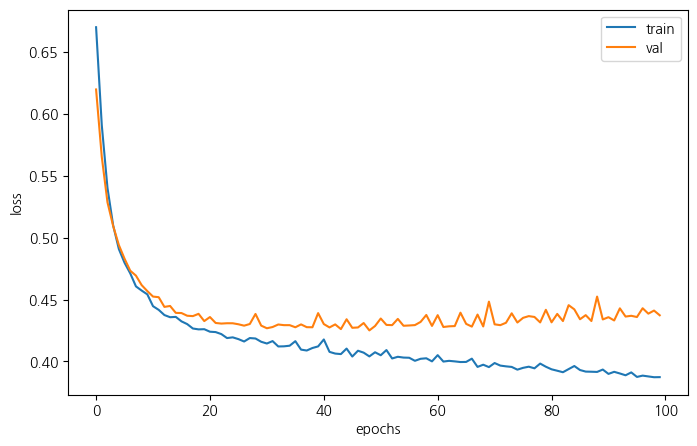

In [80]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))

# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)
print(classification_report(y_test, pred))
print()

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Class형 만들기 (Model Subclass API)
- class 형태의 모델 정의 방법
- keras의 Model을 상속받아 작성

In [82]:
class Titanic(Model):
    
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')
    
    def call(self, inputs):
        x1 = self.dense1(inputs)
        x2 = self.dense2(x1)
        x3 = self.dense3(x2)
        x4 = self.dense4(x3)
        return self.classifier(x4)


In [83]:
model = Titanic()
print(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 379ms/step - accuracy: 0.5778 - loss: 0.6768 - val_accuracy: 0.7164 - val_loss: 0.6072
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7448 - loss: 0.5927 - val_accuracy: 0.7724 - val_loss: 0.5189
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7627 - loss: 0.5103 - val_accuracy: 0.7537 - val_loss: 0.4862
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7875 - loss: 0.4593 - val_accuracy: 0.8060 - val_loss: 0.4599
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7988 - loss: 0.4476 - val_accuracy: 0.7910 - val_loss: 0.4517
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8250 - loss: 0.4277 - val_accuracy: 0.8134 - val_loss: 0.4396
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8139 - loss: 0.4424 - val_accuracy: 0.8209 - val_loss: 0.4531
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7872 - loss: 0.4735 - val_accuracy: 

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.8539 - loss: 0.3668 - val_accuracy: 0.7799 - val_loss: 0.4513
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8498 - loss: 0.3795 - val_accuracy: 0.8060 - val_loss: 0.4417
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8297 - loss: 0.3988 - val_accuracy: 0.8134 - val_loss: 0.4440
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8098 - loss: 0.4174 - val_accuracy: 0.7985 - val_loss: 0.4435
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8388 - loss: 0.3840 - val_accuracy: 0.7910 - val_loss: 0.4510
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8564 - loss: 0.3635 - val_accuracy: 0.8172 - val_loss: 0.4467
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8607 - loss: 0.3628 - val_accuracy: 0.8097 - val_loss: 0.4408
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8382 - loss: 0.3888 - val_accuracy: 0.8022 

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


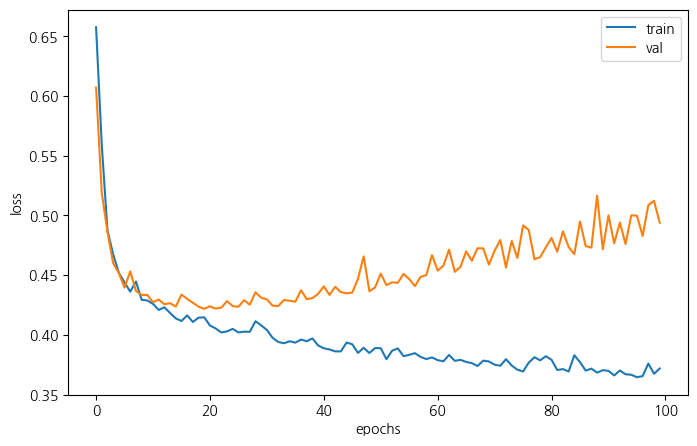

In [84]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=32, validation_data=(mms_X_test, y_test))

# test 데이터에 대한 예측 수행
pred = model.predict(mms_X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x >= 0.5 else 0)
print(classification_report(y_test, pred))
print()

# 실행 결과 확인
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [88]:
print(model.summary())

Model: "titanic"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,333 (138.02 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,556 (92.02 KB)

None
